## Data visualization project for scientific publication




This is a project I conducted in to prepare figures for a scientific paper, I changed all the data labels to non-sensical to protect its confidentiallity, but otherwise this is close to the final print.

# Set up

There is a few things we always when starting a data science project:

 -> Load the libraries,
 
 -> Import the data,
 
 -> Look at the data.

Standard stuff

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(r"C:\Users\Utente\Documents\Portfolio\Seaborn\morph.csv")

In [21]:
df_adult = df.loc[(df["age"] == "adult")]
df_adult

,sex,phenotype,age,volume,surface,lenght,sphericity
0,Male,Control,adult,5.42,34.81,2.74,0.61
1,Male,Control,adult,1.80,10.96,3.10,0.60
2,Male,Control,adult,7.29,50.83,3.91,0.53
3,Male,Control,adult,6.80,47.45,3.81,0.54
4,Male,Control,adult,2.78,18.06,3.59,0.55
...,...,...,...,...,...,...,...
418,Female,DC,adult,4.32,29.44,3.28,0.60
419,Female,DC,adult,3.30,17.23,3.83,0.60
420,Female,DC,adult,4.04,29.48,2.90,0.61
421,Female,DC,adult,2.36,12.93,3.24,0.64


## Colorcoding the phenotypes

The following code is a dictionary that holds the color information representative of each phenotype, whenever I need it down the line, I'll just reference it.

In [22]:
colors = {"Control": "gray", "AC": "green", "DC": "blue"}

## 1st graph
To be publication ready, the images will need many specifications:
1. We want to create panels, not just single images
2. We need significance brackets, that are not done automatically, so we need to write where to put them
3. My colleages wanted a vertical dashed line dividing groups in the middle
4. And then there are many stylistic adjustments that make it look professional

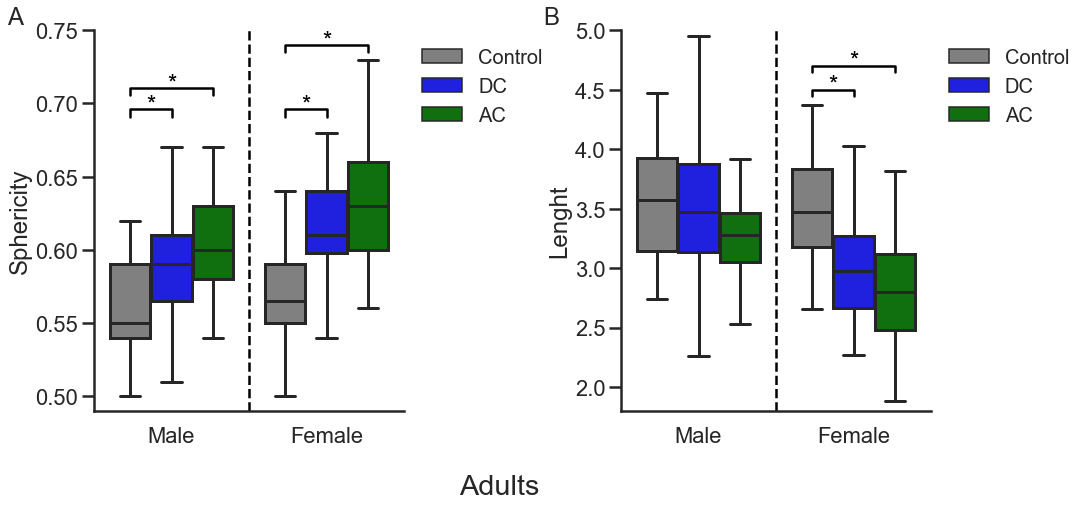

In [23]:
#Stylistic options

sns.set_style("ticks")
sns.set_context("poster")

#Creating a figure panel

f, axes = plt.subplots(ncols=2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.7)
plt.suptitle("Adults", y = 0)

#1st graph

sns.boxplot(x = "sex", 
            y = "sphericity", 
            data = df_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0],
            palette=colors)


axes[0].set_ylabel("Sphericity")
axes[0].set_title("A", loc="left", x=-0.28)
axes[0].tick_params(bottom=False)

#Significance Brackets

y = df["sphericity"].max()
h = y/150
col = "k"

x1, x2 = -0.27, 0.27   # AC male
axes[0].plot([x1, x1, x2, x2], [y-5*h, y-4*h, y-4*h, y-5*h], lw=2.5, c=col)
axes[0].text((x1+x2)*.5, y-5*h, "*", ha='center', va='bottom', color=col)

x1, x2 = -0.27, 0   # DC male
axes[0].plot([x1, x1, x2, x2], [y-8*h, y-7*h, y-7*h, y-8*h], lw=2.5, c=col)
axes[0].text((x1+x2)*.5, y-8*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1   # DC female
axes[0].plot([x1, x1, x2, x2], [y-8*h, y-7*h, y-7*h, y-8*h], lw=2.5, c=col)
axes[0].text((x1+x2)*.5, y-8*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female
axes[0].plot([x1, x1, x2, x2], [y+1*h, y+2*h, y+2*h, y+1*h], lw=2.5, c=col)
axes[0].text((x1+x2)*.5, y+1*h, "*", ha='center', va='bottom', color=col)

#Central dashed line

y1, y2, x3 = 0.49, 0.75, 0.5
axes[0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[0].set_xlim(-0.5,1.5)
axes[0].set_ylim(y1,y2)

#Final stylistic adjustments

axes[0].legend(prop={'size': 20}, bbox_to_anchor = (1,1), frameon=False)
axes[0].xaxis.label.set_visible(False)

#2nd Graph

sns.boxplot(x = "sex", 
            y = "lenght", 
            data = df_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1],
            palette=colors)

axes[1].set_ylabel("Lenght")
axes[1].set_title("B", loc="left", x=-0.25)
axes[1].tick_params(bottom=False)

#Significance Brackets

y, h, col = df["lenght"].max(), df["lenght"].max()/100, 'k'

x1, x2 = 0.73, 1   # DC female
axes[1].plot([x1, x1, x2, x2], [y-12*h, y-11*h, y-11*h, y-12*h], lw=2.5, c=col)
axes[1].text((x1+x2)*.5, y-12*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female
axes[1].plot([x1, x1, x2, x2], [y-8*h, y-7*h, y-7*h, y-8*h], lw=2.5, c=col)
axes[1].text((x1+x2)*.5, y-8*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 1.8, 5, 0.5
axes[1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[1].set_xlim(-0.5,1.5)
axes[1].set_ylim(y1,y2)

#Final stylistic adjustments

axes[1].legend(prop={'size': 20}, bbox_to_anchor = (1,1), frameon=False)
axes[1].xaxis.label.set_visible(False)

sns.despine()

#Creating a file and showing the final result

plt.savefig('panel1.jpg', bbox_inches='tight')
plt.show()

In [24]:
dw = pd.read_csv(r"C:\Users\Utente\Documents\Portfolio\Seaborn\b2.csv")

In [25]:
dw_adult = dw.loc[dw["age"] == "Adult"]
dw_adult

,sex,phenotype,age,Irr,Pecs D,Pecs CD,Pecs CCC,Pecs CC,Pecs C,8PI
0,Male,Control,Adult,1.01,0.79,0.66,0.85,0.78,0.87,0.677420
1,Male,Control,Adult,1.22,0.98,0.73,0.79,0.47,0.88,0.615913
2,Male,Control,Adult,1.11,1.11,0.74,0.89,0.70,1.02,0.750518
3,Male,Control,Adult,1.13,1.16,0.65,1.14,0.79,0.94,1.019983
4,Male,Control,Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
107,Female,AC,Adult,0.80,NaN,NaN,NaN,NaN,NaN,1.688817
108,Female,DC,Adult,0.66,1.30,0.57,1.04,0.65,1.25,0.949093
109,Female,DC,Adult,0.64,1.04,0.59,0.67,0.59,0.92,0.853860
110,Female,DC,Adult,0.61,1.42,0.79,0.79,0.94,1.05,0.829771


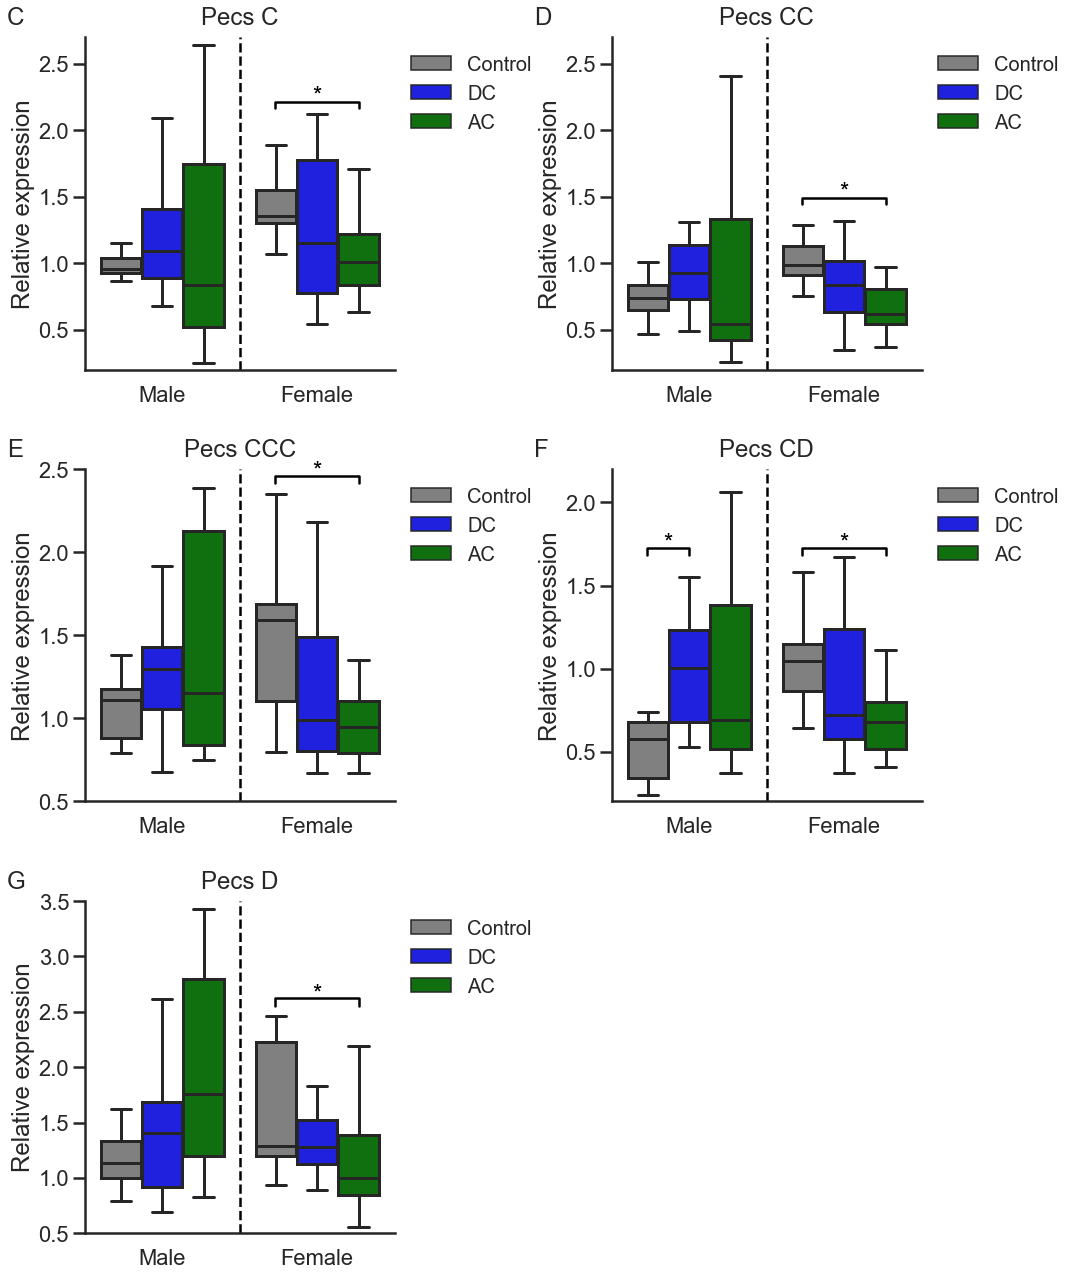

In [26]:
#general settings
sns.set_style("ticks")
sns.set_context("poster")

f, axes = plt.subplots(ncols=2,
                     nrows=3,
                     figsize=(15, 22))
f.delaxes(axes[2,1])

plt.subplots_adjust(wspace=0.7, hspace=0.3)

#graph 1

sns.boxplot(x = "sex", 
            y = "Pecs C", 
            data = dw_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,0],
            palette=colors)

axes[0,0].set_ylabel("Relative expression")
axes[0,0].set_title("Pecs C", y=1.02)
axes[0,0].set_title("C", loc="left", x=-0.25, y=1.02)

y = dw["Pecs C"].max()
h = y/80
col = "k"

x1, x2 = 0.73, 1.27   # AC female
axes[0,0].plot([x1, x1, x2, x2], [y-28*h, y-27*h, y-27*h, y-28*h], lw=2.5, c=col)
axes[0,0].text((x1+x2)*.5, y-28*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.2, 2.7, 0.5
axes[0,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[0,0].set_xlim(-0.5,1.5)
axes[0,0].set_ylim(y1,y2)


axes[0,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[0,0].tick_params(bottom=False)
axes[0,0].xaxis.label.set_visible(False)

#graph 2

sns.boxplot(x = "sex", 
            y = "Pecs CC", 
            data = dw_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,1],
            palette=colors)

axes[0,1].set_ylabel("Relative expression")
axes[0,1].set_title("Pecs CC", y=1.02)
axes[0,1].set_title("D", loc="left", x=-0.25, y=1.02)

y = dw["Pecs CC"].max()
h = y/50
col = "k"

x1, x2 = 0.73, 1.27   # AC female
axes[0,1].plot([x1, x1, x2, x2], [y-20*h, y-19*h, y-19*h, y-20*h], lw=2.5, c=col)
axes[0,1].text((x1+x2)*.5, y-20*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.2, 2.7, 0.5
axes[0,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[0,1].set_xlim(-0.5,1.5)
axes[0,1].set_ylim(y1,y2)

axes[0,1].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[0,1].tick_params(bottom=False)
axes[0,1].xaxis.label.set_visible(False)

#graph 3

sns.boxplot(x = "sex", 
            y = "Pecs CCC", 
            data = dw_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,0],
            palette=colors)

axes[1,0].set_ylabel("Relative expression")
axes[1,0].set_title("Pecs CCC", y=1.02)
axes[1,0].set_title("E", loc="left", x=-0.25, y=1.02)

y = dw["Pecs CCC"].max()
h = y/80
col = "k"

x1, x2 = 0.73, 1.27   # AC female
axes[1,0].plot([x1, x1, x2, x2], [y-24*h, y-23*h, y-23*h, y-24*h], lw=2.5, c=col)
axes[1,0].text((x1+x2)*.5, y-24*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.5, 2.5, 0.5
axes[1,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[1,0].set_xlim(-0.5,1.5)
axes[1,0].set_ylim(y1,y2)

axes[1,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[1,0].tick_params(bottom=False)
axes[1,0].xaxis.label.set_visible(False)

# graph 4

sns.boxplot(x = "sex", 
            y = "Pecs CD", 
            data = dw_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,1],
            palette=colors)

axes[1,1].set_ylabel("Relative expression")
axes[1,1].set_title("Pecs CD", y=1.02)
axes[1,1].set_title("F", loc="left", x=-0.25, y=1.02)

y = dw["Pecs CD"].max()
h = y/80
col = "k"

x1, x2 = -0.27, 0   # DC male
axes[1,1].plot([x1, x1, x2, x2], [y-39*h, y-38*h, y-38*h, y-39*h], lw=2.5, c=col)
axes[1,1].text((x1+x2)*.5, y-39*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female
axes[1,1].plot([x1, x1, x2, x2], [y-39*h, y-38*h, y-38*h, y-39*h], lw=2.5, c=col)
axes[1,1].text((x1+x2)*.5, y-39*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.2, 2.2, 0.5
axes[1,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[1,1].set_xlim(-0.5,1.5)
axes[1,1].set_ylim(y1,y2)

axes[1,1].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[1,1].tick_params(bottom=False)
axes[1,1].xaxis.label.set_visible(False)

#graph 5

sns.boxplot(x = "sex", 
            y = "Pecs D", 
            data = dw_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[2,0],
            palette=colors)

axes[2,0].set_ylabel("Relative expression")
axes[2,0].set_title("Pecs D", y=1.02)
axes[2,0].set_title("G", loc="left", x=-0.25, y=1.02)

y = dw["Pecs D"].max()
h = y/50
col = "k"


x1, x2 = 0.73, 1.27   # AC female
axes[2,0].plot([x1, x1, x2, x2], [y-13*h, y-12*h, y-12*h, y-13*h], lw=2.5, c=col)
axes[2,0].text((x1+x2)*.5, y-13*h, "*", ha='center', va='bottom', color=col)


y1, y2, x3 = 0.5, 3.5, 0.5
axes[2,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")

axes[2,0].set_xlim(-0.5,1.5)
axes[2,0].set_ylim(y1,y2)

axes[2,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[2,0].tick_params(bottom=False)
axes[2,0].xaxis.label.set_visible(False)

#general final
sns.despine()

plt.savefig('panel2.jpg', bbox_inches='tight')
plt.show()

In [27]:
dq = pd.read_csv(r"C:\Users\Utente\Documents\Portfolio\Seaborn\rpq.csv")
dq_adult = dq.loc[dq["age"] == "Adult"]
dq_adult

dq_f = dq.loc[dw["sex"] == "Female"]
dq_ac = dq_f.loc[dq_f["phenotype"] != "DC"]
dq_ac

,sex,phenotype,age,OLA,DERP,1MF,2MF,NOW,SHAO,SHDO,OX4U,CYBR,mitho,dopple
12,Female,Control,Adult,1.02,1.11,0.85,0.86,1.16,0.96,1.15,0.93,0.89,1.37,6549.16
13,Female,Control,Adult,0.84,1.03,0.95,0.87,1.14,0.99,1.19,0.97,0.92,1.24,5147.13
14,Female,Control,Adult,1.00,1.09,0.94,0.61,0.71,0.85,1.05,0.96,0.88,1.28,5457.47
15,Female,Control,Adult,NaN,NaN,NaN,0.89,1.08,NaN,NaN,NaN,NaN,1.49,7195.08
16,Female,Control,Adult,1.16,0.99,1.56,1.65,1.05,1.61,1.27,1.18,1.01,0.74,3559.45
17,Female,Control,Adult,1.51,1.01,1.26,1.61,0.93,1.38,1.17,1.09,1.02,0.70,2910.49
18,Female,Control,Adult,1.31,0.98,1.36,1.79,1.09,1.55,1.22,1.15,1.23,0.82,3492.89
19,Female,Control,Adult,NaN,NaN,NaN,1.63,0.99,NaN,NaN,NaN,NaN,0.73,3522.64
20,Female,Control,Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Female,Control,Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


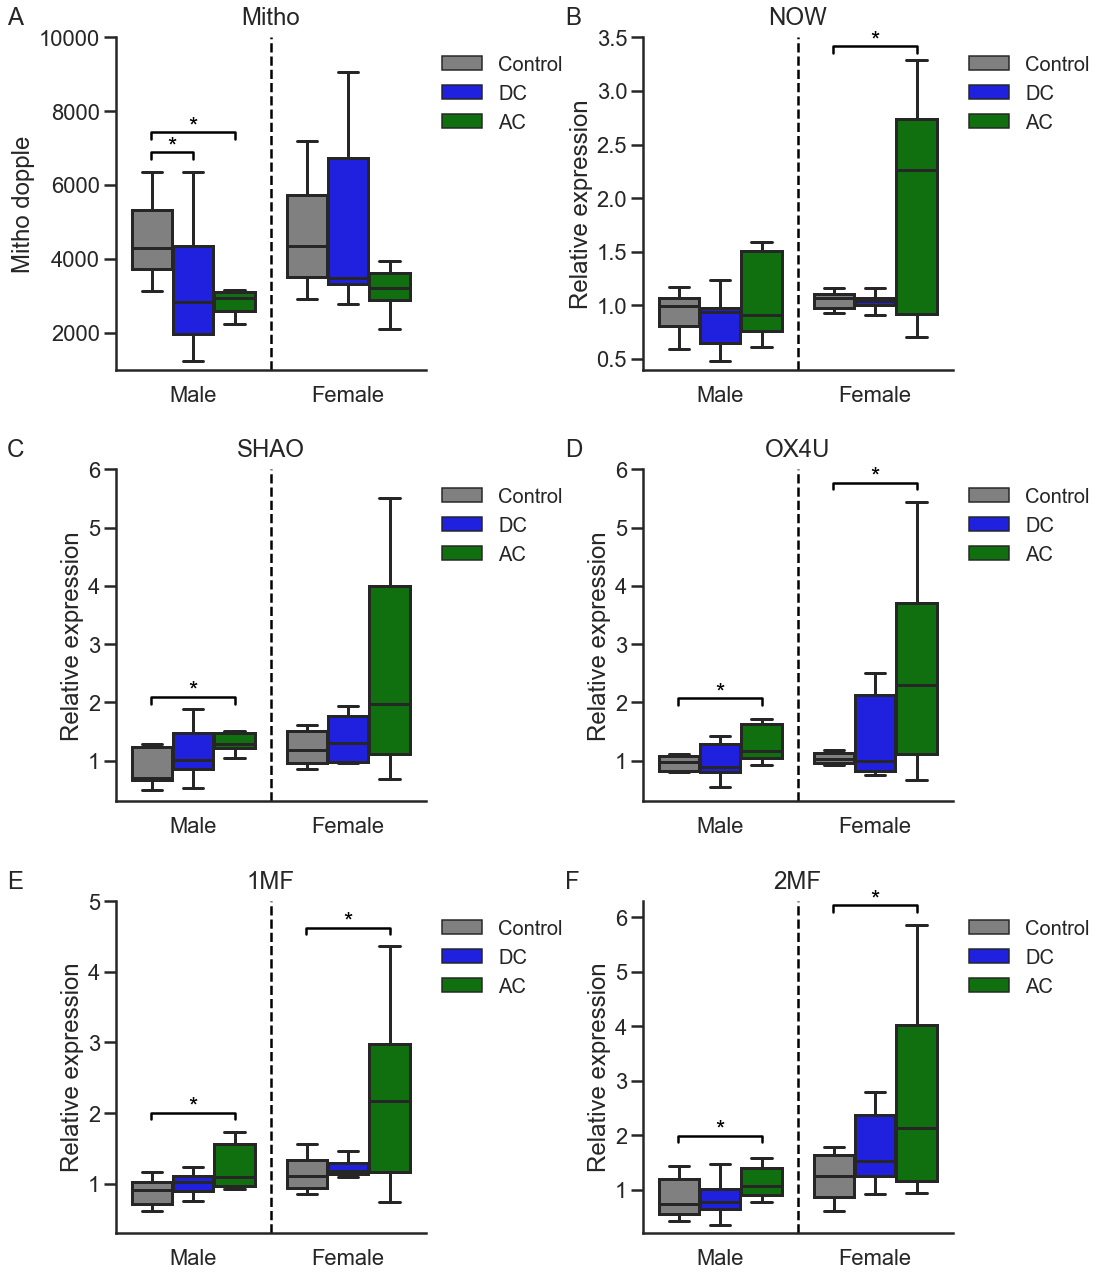

In [28]:
#general initial

sns.set_style("ticks")
sns.set_context("poster")

f, axes = plt.subplots(ncols=2,
                     nrows=3,
                     figsize=(15, 22))

plt.subplots_adjust(wspace=0.7, hspace=0.3)

# graph1
sns.boxplot(x = "sex", 
            y = "dopple", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,0],
            palette=colors)

axes[0,0].set_ylabel("Mitho dopple")
axes[0,0].set_title("Mitho", y=1.02)
axes[0,0].set_title("A", loc="left", x=-0.35, y=1.02)

y = dq["dopple"].max()
h = y/50
col = "k"

x1, x2 = -0.27, 0.27   # AC male
axes[0,0].plot([x1, x1, x2, x2], [y-10*h, y-9*h, y-9*h, y-10*h], lw=2.5, c=col)
axes[0,0].text((x1+x2)*.5, y-10*h, "*", ha='center', va='bottom', color=col)

x1, x2 = -0.27, 0   # DC male
axes[0,0].plot([x1, x1, x2, x2], [y-13*h, y-12*h, y-12*h, y-13*h], lw=2.5, c=col)
axes[0,0].text((x1+x2)*.5, y-13*h, "*", ha='center', va='bottom', color=col)

axes[0,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[0,0].tick_params(bottom=False)
axes[0,0].xaxis.label.set_visible(False)


y1, y2, x3 = 1000, 10000, 0.5
axes[0,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[0,0].set_xlim(-0.5,1.5)
axes[0,0].set_ylim(y1,y2)

# graph2

sns.boxplot(x = "sex", 
            y = "NOW", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,1],
            palette=colors)

axes[0,1].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[0,1].tick_params(bottom=False)
axes[0,1].xaxis.label.set_visible(False)

axes[0,1].set_ylabel("Relative expression")
axes[0,1].set_title("NOW", y=1.02)
axes[0,1].set_title("B", loc="left", x=-0.25, y=1.02)

y = dq["NOW"].max()
h = y/50
col = "k"

x1, x2 = 0.73, 1.27   # AC female adult
axes[0,1].plot([x1, x1, x2, x2], [y+h, y+2*h, y+2*h, y+h], lw=2.5, c=col)
axes[0,1].text((x1+x2)*.5, y+1*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.4, 3.5, 0.5
axes[0,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[0,1].set_xlim(-0.5,1.5)
axes[0,1].set_ylim(y1,y2)

# graph3

sns.boxplot(x = "sex", 
            y = "SHAO", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,0],
            palette=colors)

axes[1,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[1,0].tick_params(bottom=False)
axes[1,0].xaxis.label.set_visible(False)

axes[1,0].set_ylabel("Relative expression")
axes[1,0].set_title("SHAO", y=1.02)
axes[1,0].set_title("C", loc="left", x=-0.35, y=1.02)

y = dq["SHAO"].max()
h = y/50
col = "k"

x1, x2 = -0.27, 0.27   # AC male adult
axes[1,0].plot([x1, x1, x2, x2], [y/2-7*h, y/2-6*h, y/2-6*h, y/2-7*h], lw=2.5, c=col)
axes[1,0].text((x1+x2)*.5, y/2-7*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.3, 6, 0.5
axes[1,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[1,0].set_xlim(-0.5,1.5)
axes[1,0].set_ylim(y1,y2)
# graph 4
sns.boxplot(x = "sex", 
            y = "OX4U", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,1],
            palette=colors)

axes[1,1].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[1,1].tick_params(bottom=False)
axes[1,1].xaxis.label.set_visible(False)

axes[1,1].set_ylabel("Relative expression")
axes[1,1].set_title("OX4U", y=1.02)
axes[1,1].set_title("D", loc="left", x=-0.25, y=1.02)

y = dq["OX4U"].max()
h = y/50
col = "k"

x1, x2 = -0.27, 0.27   # AC male adult
axes[1,1].plot([x1, x1, x2, x2], [y/2-7*h, y/2-6*h, y/2-6*h, y/2-7*h], lw=2.5, c=col)
axes[1,1].text((x1+x2)*.5, y/2-7*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female adult
axes[1,1].plot([x1, x1, x2, x2], [y+2*h, y+3*h, y+3*h, y+2*h], lw=2.5, c=col)
axes[1,1].text((x1+x2)*.5, y+2*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.3, 6, 0.5
axes[1,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[1,1].set_xlim(-0.5,1.5)
axes[1,1].set_ylim(y1,y2)

# graph 5
sns.boxplot(x = "sex", 
            y = "1MF", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[2,0],
            palette=colors)

axes[2,0].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[2,0].tick_params(bottom=False)
axes[2,0].xaxis.label.set_visible(False)

axes[2,0].set_ylabel("Relative expression")
axes[2,0].set_title("1MF", y=1.02)
axes[2,0].set_title("E", loc="left", x=-0.35, y=1.02)

y = dq["1MF"].max()
h = y/50
col = "k"

x1, x2 = -0.27, 0.27   # AC male adult
axes[2,0].plot([x1, x1, x2, x2], [y/2-3*h, y/2-2*h, y/2-2*h, y/2-3*h], lw=2.5, c=col)
axes[2,0].text((x1+x2)*.5, y/2-3*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female adult
axes[2,0].plot([x1, x1, x2, x2], [y+2*h, y+3*h, y+3*h, y+2*h], lw=2.5, c=col)
axes[2,0].text((x1+x2)*.5, y+2*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.3, 5, 0.5
axes[2,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[2,0].set_xlim(-0.5,1.5)
axes[2,0].set_ylim(y1,y2)
# graph 6
sns.boxplot(x = "sex", 
            y = "2MF", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[2,1],
            palette=colors)

axes[2,1].legend(prop={'size': 20}, bbox_to_anchor = (1.5,1), frameon=False)
axes[2,1].tick_params(bottom=False)
axes[2,1].xaxis.label.set_visible(False)

axes[2,1].set_ylabel("Relative expression")
axes[2,1].set_title("2MF", y=1.02)
axes[2,1].set_title("F", loc="left", x=-0.25, y=1.02)

y = dq["2MF"].max()
h = y/50
col = "k"

x1, x2 = -0.27, 0.27   # AC male adult
axes[2,1].plot([x1, x1, x2, x2], [y/2-9*h, y/2-8*h, y/2-8*h, y/2-9*h], lw=2.5, c=col)
axes[2,1].text((x1+x2)*.5, y/2-9*h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.73, 1.27   # AC female adult
axes[2,1].plot([x1, x1, x2, x2], [y+2*h, y+3*h, y+3*h, y+2*h], lw=2.5, c=col)
axes[2,1].text((x1+x2)*.5, y+2*h, "*", ha='center', va='bottom', color=col)

y1, y2, x3 = 0.2, 6.3, 0.5
axes[2,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[2,1].set_xlim(-0.5,1.5)
axes[2,1].set_ylim(y1,y2)
#general final
sns.despine()

plt.savefig('panel3.jpg', bbox_inches='tight')
plt.show()

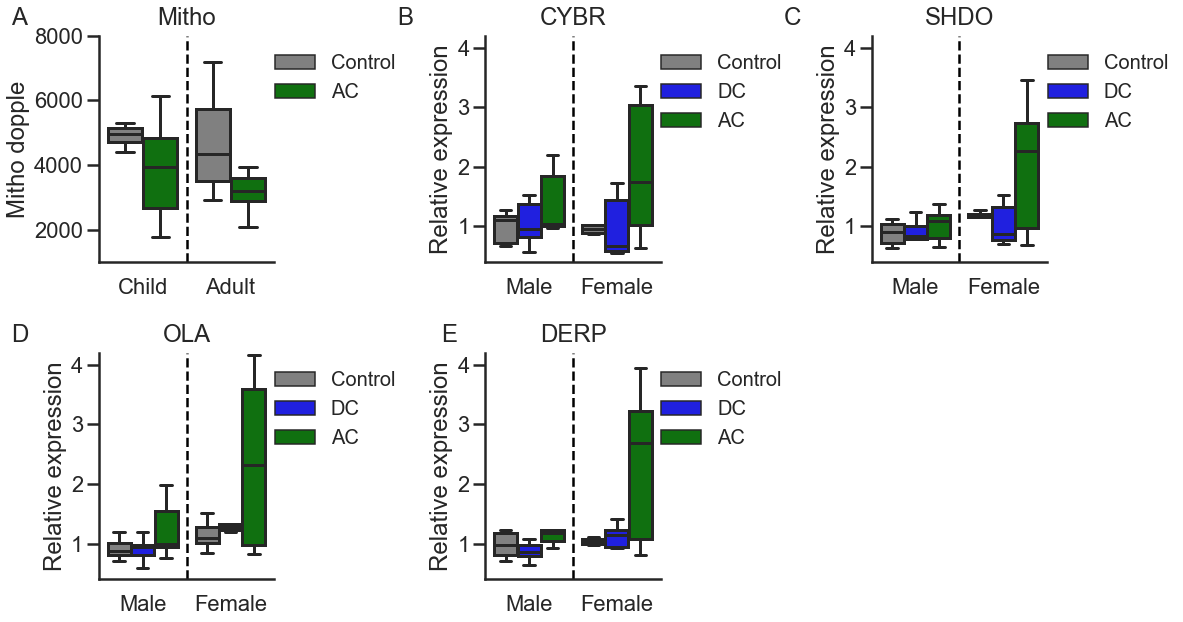

In [29]:
#general initial

sns.set_style("ticks")
sns.set_context("poster")

f, axes = plt.subplots(ncols=3,
                     nrows=2,
                     figsize=(17, 10))
f.delaxes(axes[1,2])

plt.subplots_adjust(wspace=1.2, hspace=0.4)

# graph1
sns.boxplot(x = "age", 
            y = "dopple", 
            data = dq_ac, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,0],
            palette=colors,
            order = ["Child", "Adult"])

axes[0,0].set_ylabel("Mitho dopple")
axes[0,0].set_title("Mitho", y=1.02)
axes[0,0].set_title("A", loc="left", x=-0.5, y=1.02)

axes[0,0].legend(prop={'size': 20}, bbox_to_anchor = (0.9,1), frameon=False)
axes[0,0].tick_params(bottom=False)
axes[0,0].xaxis.label.set_visible(False)

y1, y2, x3 = 1000, 8000, 0.5
axes[0,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[0,0].set_xlim(-0.5,1.5)
axes[0,0].set_ylim(y1,y2)

# graph2

sns.boxplot(x = "sex", 
            y = "CYBR", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,1],
            palette=colors)

axes[0,1].legend(prop={'size': 20}, bbox_to_anchor = (0.9,1), frameon=False)
axes[0,1].tick_params(bottom=False)
axes[0,1].xaxis.label.set_visible(False)

axes[0,1].set_ylabel("Relative expression")
axes[0,1].set_title("CYBR", y=1.02)
axes[0,1].set_title("B", loc="left", x=-0.5, y=1.02)

y1, y2, x3 = 0.4, 4.2, 0.5
axes[0,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[0,1].set_xlim(-0.5,1.5)
axes[0,1].set_ylim(y1,y2)

# graph3

sns.boxplot(x = "sex", 
            y = "SHDO", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[0,2],
            palette=colors)

axes[0,2].legend(prop={'size': 20}, bbox_to_anchor = (0.9,1), frameon=False)
axes[0,2].tick_params(bottom=False)
axes[0,2].xaxis.label.set_visible(False)

axes[0,2].set_ylabel("Relative expression")
axes[0,2].set_title("SHDO", y=1.02)
axes[0,2].set_title("C", loc="left", x=-0.5, y=1.02)

y1, y2, x3 = 0.4, 4.2, 0.5
axes[0,2].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[0,2].set_xlim(-0.5,1.5)
axes[0,2].set_ylim(y1,y2)
# graph 4
sns.boxplot(x = "sex", 
            y = "OLA", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,0],
            palette=colors)

axes[1,0].legend(prop={'size': 20}, bbox_to_anchor = (0.9,1), frameon=False)
axes[1,0].tick_params(bottom=False)
axes[1,0].xaxis.label.set_visible(False)

axes[1,0].set_ylabel("Relative expression")
axes[1,0].set_title("OLA", y=1.02)
axes[1,0].set_title("D", loc="left", x=-0.5, y=1.02)

y1, y2, x3 = 0.4, 4.2, 0.5
axes[1,0].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[1,0].set_xlim(-0.5,1.5)
axes[1,0].set_ylim(y1,y2)

# graph 5
sns.boxplot(x = "sex", 
            y = "DERP", 
            data = dq_adult, 
            hue = "phenotype", 
            showfliers = False,
            ax=axes[1,1],
            palette=colors)

axes[1,1].legend(prop={'size': 20}, bbox_to_anchor = (0.9,1), frameon=False)
axes[1,1].tick_params(bottom=False)
axes[1,1].xaxis.label.set_visible(False)

axes[1,1].set_ylabel("Relative expression")
axes[1,1].set_title("DERP", y=1.02)
axes[1,1].set_title("E", loc="left", x=-0.25, y=1.02)

y1, y2, x3 = 0.4, 4.2, 0.5
axes[1,1].plot([x3, x3], [y1, y2], lw=2.5, c=col, linestyle="dashed")
axes[1,1].set_xlim(-0.5,1.5)
axes[1,1].set_ylim(y1,y2)
#general final
sns.despine()

plt.savefig('panel7.jpg', bbox_inches='tight')
plt.show()